## UNAD

## ANDERSON ANDREY QUITIAN PEREZ

## PASO 5 REGRESION LOGISTICA

## PASOS DE LA ACTIVIDAD

In [2]:
#1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#4 Entrenar el modelo configurando los diferentes hiperparámetros.
#5 Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
#6 Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#7 Interpretar, analizar y documentar los resultados obtenidos.
#8 Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import pandas as pd

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('C:/UNAD_TAREA_5/Titanic-Dataset.csv')

In [29]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(150)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S


In [31]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Obtener informacióin sobrel tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

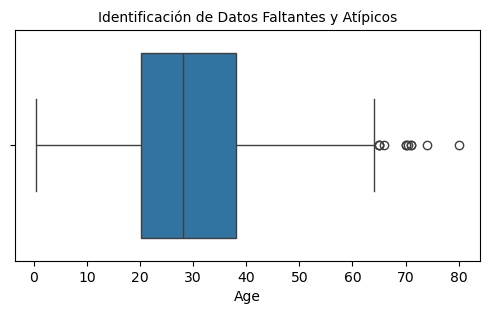

In [35]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

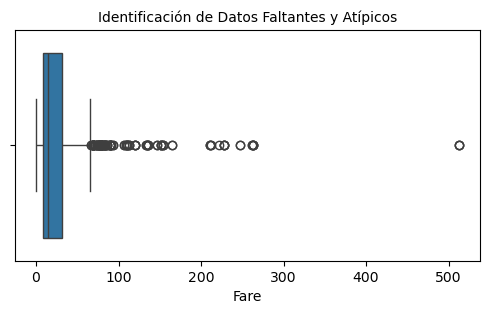

In [37]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

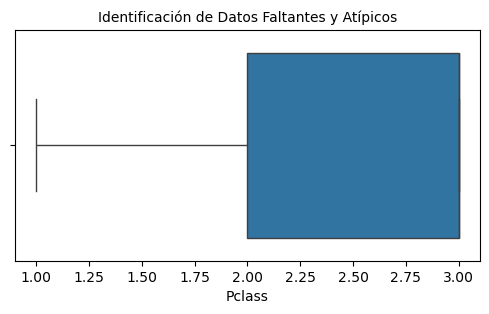

In [39]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

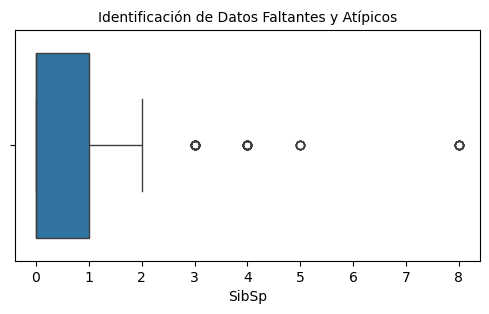

In [41]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

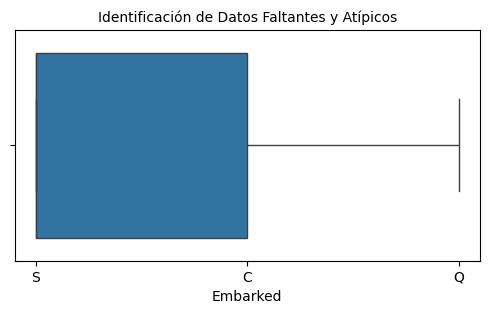

In [43]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Embarked'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [45]:
#Idéntificar columnas con datos faltantes
print(Datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'identificacion de datos')

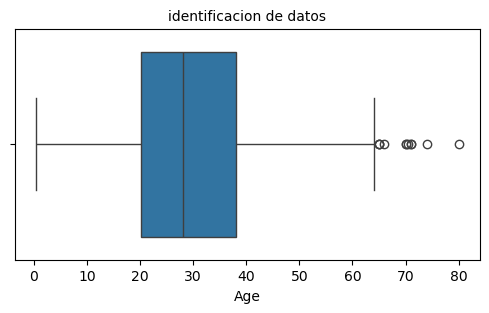

In [47]:
# Idéntificar valores atípicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('identificacion de datos', fontsize=10)

In [49]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en clase social: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en facturación: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero familiares: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en pasajerod del enbarcadero: ",Datos['Embarked'].isin([0]).sum())
print("Cantidad de Registros con cero en ingreso de cabina: ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en la fila hombres o mujeres: ",Datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en la fila sobrevivientes: ",Datos['Survived'].isin([0]).sum())

Cantidad de Registros con cero en clase social:  0
Cantidad de Registros con cero en facturación:  15
Cantidad de Registros con cero familiares:  608
Cantidad de Registros con cero en pasajerod del enbarcadero:  0
Cantidad de Registros con cero en ingreso de cabina:  0
Cantidad de Registros con cero en la fila hombres o mujeres:  0
Cantidad de Registros con cero en la fila sobrevivientes:  549


In [51]:
Datos['Survived']=Datos['Survived'].replace(0,Datos['Survived'].mean())

In [125]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en clase social: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en facturación: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero familiares: ",Datos['SibSp'].isin([0]).sum())
print("Cantidad de Registros con cero en pasajerod del enbarcadero: ",Datos['Embarked'].isin([0]).sum())
print("Cantidad de Registros con cero en ingreso de cabina: ",Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en la fila hombres o mujeres: ",Datos['Sex'].isin([0]).sum())
print("Cantidad de Registros con cero en la fila sobrevivientes: ",Datos['Survived'].isin([0]).sum())

Cantidad de Registros con cero en clase social:  0
Cantidad de Registros con cero en facturación:  0
Cantidad de Registros con cero familiares:  0
Cantidad de Registros con cero en pasajerod del enbarcadero:  0
Cantidad de Registros con cero en ingreso de cabina:  0
Cantidad de Registros con cero en la fila hombres o mujeres:  0
Cantidad de Registros con cero en la fila sobrevivientes:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

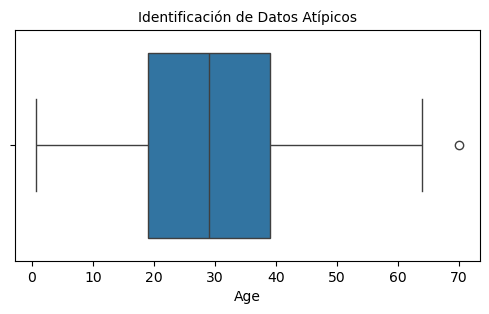

In [127]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [129]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

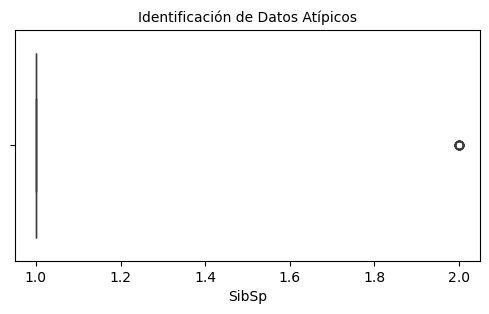

In [131]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [133]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=3
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 193


In [135]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['SibSp']<nivel_maximo)&(Datos['SibSp']>nivel_minimo)]

In [137]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['SibSp']<nivel_minimo)|(Datos['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

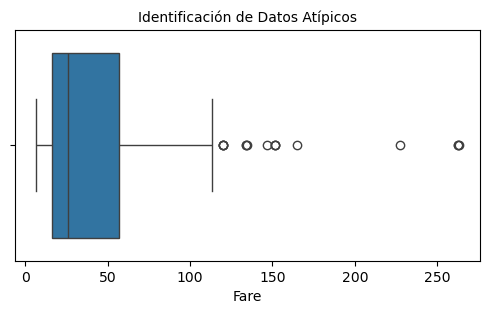

In [139]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [141]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=300
Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [143]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Fare']<nivel_maximo)&(Datos['Fare']>nivel_minimo)]

In [145]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Fare']<nivel_minimo)|(Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

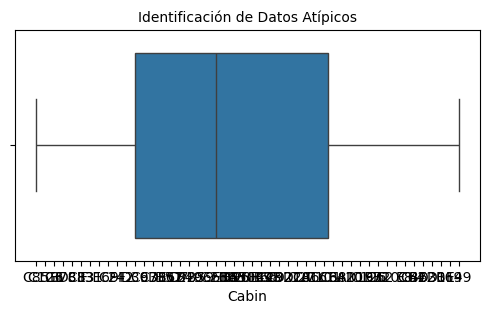

In [147]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Cabin'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [149]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  237 non-null    int64  
 1   Survived     237 non-null    float64
 2   Pclass       237 non-null    int64  
 3   Name         237 non-null    object 
 4   Sex          237 non-null    object 
 5   Age          208 non-null    float64
 6   SibSp        237 non-null    int64  
 7   Parch        237 non-null    int64  
 8   Ticket       237 non-null    object 
 9   Fare         237 non-null    float64
 10  Cabin        75 non-null     object 
 11  Embarked     237 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 24.1+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [152]:
# Total de personas sobrevivientes

Datos['Survived'].value_counts()

Survived
1.000000    125
0.383838    112
Name: count, dtype: int64

In [154]:
Datos[['Survived']].head(50)

,Survived
0,0.383838
1,1.000000
3,1.000000
9,1.000000
10,1.000000
13,0.383838
18,0.383838
25,1.000000
31,1.000000
34,0.383838


In [156]:
Datos.head()

#nuevo_data = dataset[["Nombre", "Edad", "Ciudad"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.383838,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1.000000,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1.000000,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [158]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  237 non-null    int64  
 1   Survived     237 non-null    float64
 2   Pclass       237 non-null    int64  
 3   Name         237 non-null    object 
 4   Sex          237 non-null    object 
 5   Age          208 non-null    float64
 6   SibSp        237 non-null    int64  
 7   Parch        237 non-null    int64  
 8   Ticket       237 non-null    object 
 9   Fare         237 non-null    float64
 10  Cabin        75 non-null     object 
 11  Embarked     237 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 24.1+ KB


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [161]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna sobreviventes
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna sobrevivientes

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [163]:
print (X_train)

     PassengerId  Pclass                                               Name  \
860          861       3                            Hansen, Mr. Claus Peter   
852          853       3                            Boulos, Miss. Nourelain   
657          658       3                      Bourke, Mrs. John (Catherine)   
436          437       3               Ford, Miss. Doolina Margaret "Daisy"   
438          439       1                                  Fortune, Mr. Mark   
..           ...     ...                                                ...   
736          737       3            Ford, Mrs. Edward (Margaret Ann Watson)   
206          207       3                         Backstrom, Mr. Karl Alfred   
402          403       3                           Jussila, Miss. Mari Aina   
25            26       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
871          872       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   

        Sex   Age  SibSp  Parch      Ticket      Fa

In [165]:
print (Y_train)

860    0.383838
852    0.383838
657    0.383838
436    0.383838
438    0.383838
         ...   
736    0.383838
206    0.383838
402    0.383838
25     1.000000
871    1.000000
Name: Survived, Length: 177, dtype: float64


## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer



X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)


#Calcular los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train_numeric)
X_test_numeric = imputer.transform(X_test_numeric)

# Convertir 'Sobrevivido' nuevamente a valores discretos (0 y 1) para regresión
# logística
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


# ajustar el modelo usando solo datos numéricos y un objetivo discreto
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train_numeric, Y_train)

# Hace predeccion modelo regresion
Prediccion = modelo_regresion.predict(X_test_numeric)

In [170]:
print (Y_test)

128    1
69     0
48     0
58     1
249    0
186    1
743    0
490    0
336    0
215    1
690    1
352    0
437    1
820    1
192    1
546    1
559    1
476    0
370    1
544    0
248    1
660    1
245    0
424    0
457    1
440    1
671    0
809    1
608    1
9      1
617    0
700    1
484    1
1      1
316    1
253    0
529    0
137    0
311    1
489    1
799    0
595    0
801    1
665    0
393    1
117    0
113    0
746    0
587    1
741    0
768    0
347    1
742    1
835    1
314    0
854    0
581    1
334    1
637    0
451    0
Name: Survived, dtype: int32


In [172]:
print (Prediccion)

[0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [175]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        28
           1       0.68      0.78      0.72        32

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

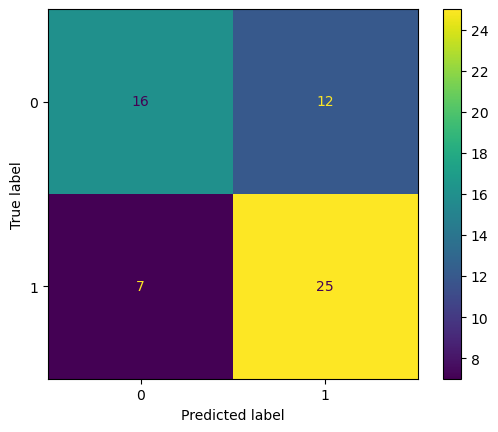

In [178]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

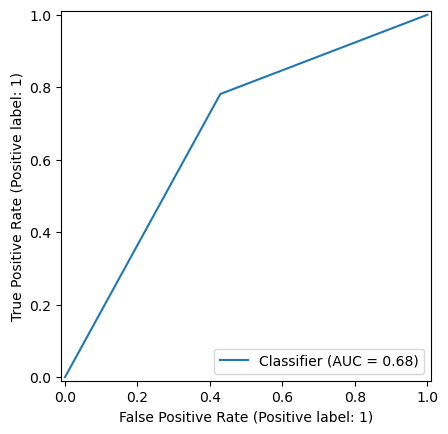

In [180]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


## 8. Interpretar, analizar y documentar los resultados obtenidos.

In [ ]:
# Explicación del modelo en word.

## 9. Crear una cuenta en GitHub y cargar el código del modelo diseñado https://github.com/.